<a href="https://colab.research.google.com/github/wagnerpulido/CD06/blob/main/ANS_Aula_01_(completa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina de Aprendizado de Máquina não supervisionado

## Aula 01

---

### Clustering: definição

*Clustering*, também chamado de "Agrupamento" ou, ainda, *cluster analysis*, é um processo que identifica grupos de elementos ou objetos similares. O objetivo é que os objetos de um grupo (*cluster*) sejam muito parecidos entre sí, mas diferentes dos que estão em outros grupos.  

### Tipos de Clustering

Há várias taxonomias. Vamos ver algumas (mas há outras).

Por uma taxonomia, os algoritmos de agrupamento podem ser divididos entre **partitivos** (também chamados de *divisivos*) ou **aglomerativos**.

O resultado pode ser **hierarquico** ou **não-hierarquico**.

Nos hierarquicos, podemos utilizar uma abordagem *bottom-up* (conhecida por *Agglomerative Hierarquical Clustering*), ou podemos utilizar uma *top-down* (divisivo). 

Os não hierarquivos podem ser **baseados em centroides**, **baseados em densidade**, ou **baseados em distribuição**. 

Os *clusters* resultantes podem ser sobrepostos (*soft clustering*) ou não (*hard clustering*), i.e., podem pertencer a mais de um *cluster* ao mesmo tempo (ou não).

Vamos iniciar com algoritmos partitivos não hierarquicos, em especial com o `k-means` (também conhecido por `k-médias`).

---

### Algoritmo *k-means* 

Exigem que o usuário indique quantos clusters quer gerar (`k`). 

São *não-determinísticos*, ou seja, o resultado pode ser diferente a cada execução, mesmo tendo os mesmos dados de entrada. 

Geram *clusters* esféricos e são escaláveis em termos de complexidade computacional. Mas não funcionam bem para dados que possuem formatos complexos e de tamanhos diferentes e não são apropriados para clusters de diferentes densidades.

O funcionamento básico consiste em dividir o espaço de elementos em `k` *clusters* esféricos. Para tanto, `k` centroides são gerados aleatoriamente no espaço de elementos. Um centroide é um ponto que representa o centro de um cluster. A partir disso, o algoritmo avalia elemento por elemento e o objetivo é alocar cada um deles ao centróide mais próximo. Após escolher um centróide, o elemento é adicionado ao cluster correspondente e o centróide é recalculado (pela média de todos os elementos já atribuídos àquele cluster). 

Esse algoritmo usa um processo chamado de *expectation-maximization*. O primeiro passo (escolha do cluster) é o *expection*. O segundo, de recálculo, é o de *maximization*.

Pseudo-algoritmo:
1. especificar o número de clusters (`k`)
2. inicializar de forma aleatória os `k` centroides
3. Repetir (até que as posições dos centroides não mudem mais):
    1. Expectation
    2. Maximization

Repare que o k-means (k-médias) é partitivo.

#### Implementação

Poderíamos implementar o algoritmo, mas já há uma implementação boa e robusta na biblioteca `scikit-learn`, de aprendizado de máquina. 

Essa biblioteca e outras importantes já estão instaladas no Google Colab, mas se você for usar outra plataforma, talvez seja necessário instalá-las. 

Você precisará das seguintes bibliotecas: `matplotlib`, `numpy`, `pandas`, `seaborn`, `scikit-learn` e `kneed`. 

A única que precisaremos instalar é a `kneed`.

A célula seguinte instala a biblioteca na sessão atual. Ela terá que ser reinstalada cada vez que a sessão for reiniciada. 

Caso queira fazer uma instalação permanente, será necessário vincular este bloco de notas com seu Google Drive. Para tanto, há várias opções. você pode seguir os [passos descritos aqui](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA). Ou, ainda, pode montar seu google drive diretamente, seguindo as [instruções descritas aqui](https://medium.com/@araujo.dionata/google-colab-importando-arquivos-direto-do-google-drive-5c0fc2798480).

In [ ]:
# Instala a biblioteca kneed
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se as bibliotecas estiverem instaladas, você pode carregá-las:

In [ ]:
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Gerando datasets...

O próximo passo consiste em escolher um *dataset* para processamento. 

Inicialmente vamos criar um *dataset* aleatório (mas que contém determinadas propriedades). Mais adiante, podemos usar algum *dataset* pronto ou podemos criar algum baseado em nossos próprios dados. 

Para criarmos um *dataset*, vamos utilizar a função `make_blobs()` da biblioteca `scikit-learn`. Há outras funções de criação de *datasets* disponíveis nessa biblioteca. Cada uma cria um *dataset* com determinada característica ou propriedade. Mais adiante vamos alguns outros...

In [ ]:
features, labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

Ao chamarmos a função, definimos alguns parâmetros:
* `nsamples`: quantidade de casos (registros) a serem gerados
* `centers`: quantidade de centros (de clusters) a serem gerados
* `cluster_std`: desvio-padrão dos clusters
* `random_state`: semente de aleatoriedade. Por padrão, os dados dos casos são gerados aleatoriamente. O valor default dessa variável é `None`. Mas se desejar gerar um conjunto específico de dados, use o mesmo número (os mesmos dados serão reproduzíveis em qualquer lugar e a toda execução).

Como saída, temos dois elementos:
* `features`: array bidimensional NumPy contendo os valores de cada exemplo (x e y)
* `labels`: array unidimensional contando os *labels* dos clusters aos quais cada caso pertence.

O que ela faz, portanto, é sortear alguns elementos para cada cluster, posicionando-os ao redor de cada centro, tendo como base o desvio-padrão solicitado.

Maiores detalhes sobre essa função podem ser obtidos na página da biblioteca ([clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).

Verifique o conteúdo de cada um desses resultados:

In [ ]:
# mostra os 5 primeiros elementos presentes no dataset cridado
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
# mostra as 5 primeiras categorias (clusters) presentes no dataset criado
labels[:5]

array([1, 0, 2, 2, 2])

Vamos ver os elementos gerados. Para tanto, podemos gerar um gráfico de dispersão ou distribução. A biblioteca `matplotlib` tem uma função para isso (`scatter`). Maiores detalhes sobre a função podem ser obtidos diretamente na sua documentação ([disponível aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)): 

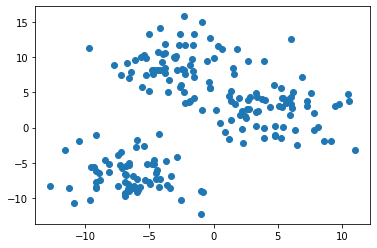

In [ ]:
# scatter é uma função da biblioteca matplotlib que gera gráficos de distribuição
# o primeiro parâmetro é a lista de valores da dimensão horizontal dos pontos a serem plotados
# o segundo parâmetro é a lista de valores da dimensão vertical dos pontos a serem plotados
fig1 = plt.scatter(features[:, 0], features[:, 1])

Vamos ver os elementos gerados (e os respectivos clusters, conforme gerados pela função): 

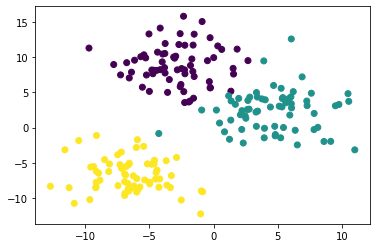

In [ ]:
fig1 = plt.scatter(features[:, 0], features[:, 1], c=labels)

Em um *dataset* real, usado em *clustering* provavelmente não teremos as informações sobre a qual grupo (*cluster*) ou categoria cada elemento pertence. Mas, para fins de estudo, vamos inicialmente utilizar *datasets* sintéticos com essas informações, para compreendermos melhor como funciona o processo.

Vamos gerar outro conjunto de dados, com outro `random_state`, para ver o que acontece:

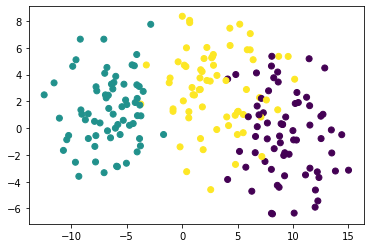

In [ ]:
features2, labels2 = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=37)
fig2 = plt.scatter(features2[:, 0], features2[:, 1], c=labels2)

**Exercício 1**: utilize a função `make_blobs()` para gerar `3` conjuntos de dados diferentes, com configurações diferentes de quantidades de dados, centros, random_states e desvios-padrões. Avalie os efeitos que esses parâmetros têm nos conjuntos resultantes. 

---
Perceba que o mesmo conjunto de dados é gerado para o mesmo *randomstate* (desde que os demais parâmetros também sejam iguais). 

Já o trecho seguinte, que não especifica o parâmetro *randomstate*, gerará um conjunto de dados diferente a cada execução. Teste!

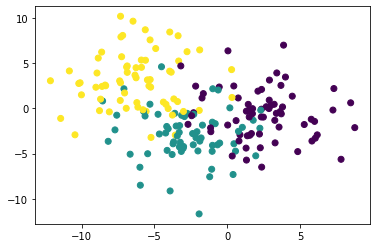

In [ ]:
features2, labels2 = make_blobs(n_samples=200, centers=3, cluster_std=2.75)
fig2 = plt.scatter(features2[:, 0], features2[:, 1], c=labels2)

### Redimensionamento (*Feature scaling*)
Em casos reais, como esses algoritmos são baseados em distância (ou proximidade) entre os elementos, é importante que todas as dimensões estejam na mesma escala. Para tanto, podemos reescalar os valores, preprocessando-os através de um processo de *feature scaling*. 

Existem diferentes métodos para realizar a padronização ou reescalamento de valores. 

A seguir vamos utilizar um deles, mas é importante conhecer outros. Sugiro a leitura do material sobre preprocessamento da biblioteca `scikit-learn`, o qual você pode acessar [clicando aqui](https://scikit-learn.org/stable/modules/preprocessing.html).

In [ ]:
# recria o dataset (pois nos exercícios anteriores podemos ter mudado o seu conteúdo)
features, labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

# Cria uma instância do "reescalador" padrão
scaler = StandardScaler()

# realiza a transformação/ajuste de escala
scaled_features = scaler.fit_transform(features)

In [ ]:
# Escalas originais
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
# Escalas ajustadas
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

O método utilizado na célula anterior padroniza os valores, escalando-os (rotacionando-os), de maneira que todos tenham uma média de 0 e um desvio padrão de 1.

Vamos comparar os resultados?

In [ ]:
# Cria um dataframe (tabela) agregando os dados originais e os ajustados (escalados)
df1 = pd.DataFrame(np.hstack((features, scaled_features)), columns=['X Original', 'Y original', 'X ajustado', 'Y ajustado'])
df1['cluster label']=labels.tolist()
df1

,X Original,Y original,X ajustado,Y ajustado,cluster label
0,9.770759,3.276210,2.130821,0.256044,1
1,-9.713497,11.274518,-1.526985,1.410367,0
2,-6.913306,-9.347559,-1.001302,-1.565832,2
3,-10.861859,-10.750635,-1.742569,-1.768325,2
4,-8.500380,-4.543704,-1.299245,-0.872534,2
...,...,...,...,...,...
195,-6.024631,-2.822880,-0.834469,-0.624183,2
196,2.677814,9.494375,0.799253,1.153455,0
197,1.833638,11.124732,0.640774,1.388750,0
198,3.342066,4.967784,0.923954,0.500173,1


Vamos plotar as duas figuras, uma ao lado da outra, para verificar que a distribuição dos dados permanece a mesma:

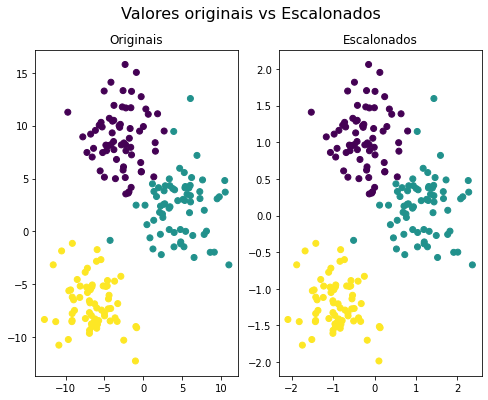

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=False, sharey=False)
fig.suptitle(f"Valores originais vs Escalonados", fontsize=16)

ax1.scatter(features[:, 0], features[:, 1], c=labels)
ax1.set_title(
    f"Originais", fontdict={"fontsize": 12}
)

ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels)
ax2.set_title(
    f"Escalonados", fontdict={"fontsize": 12}
)
plt.show()

### *Clusterizando*
Agora vamos clusterizar os dados. O objetivo da clusterização é tentar analisar um conjunto de dados (previamente desconhecidos) e tentar agrupá-los da melhor maneira possível.

Para os dados gerados anteriormente, sabemos a qual cluster cada dado pertence (pois nós os geramos). Mas imagine que você não saiba disso. Imagine que você tenha recebido um dataset e quer identificar a melhor configuração de agrupamento. Ou seja, quer explorá-los a fim de verificar como estão organizados. Verificar se há alguma semelhança entre eles (i.e., o quão próximos estão uns dos outros) e se podemos agrupá-los, segmentá-los.

A figura seguinte ilustra a situação:

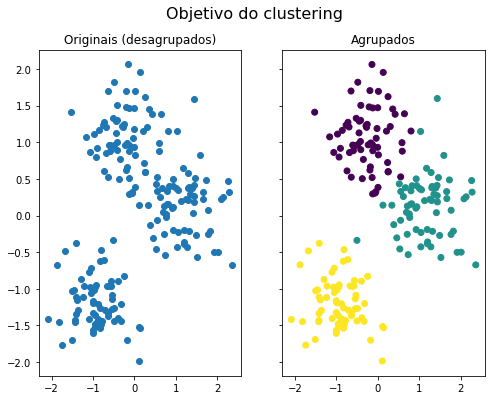

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Objetivo do clustering", fontsize=16)

ax1.scatter(scaled_features[:, 0], scaled_features[:, 1]) #, c=labels)
ax1.set_title(
    f"Originais (desagrupados)", fontdict={"fontsize": 12}
)

ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels)
ax2.set_title(
    f"Agrupados", fontdict={"fontsize": 12}
)
plt.show()

Ou seja, vamos tentar analisar os dados originais, desagrupados (figura da esquerda) e tentar agrupá-los de maneira que os similares fiquem no mesmo grupo (figura da direita).

O algoritmo `k-medias` serve para isso e vamos utilizá-lo, mas há vários parâmetros que devemos escolher (e ajustar) para que ele funcione de maneira apropriada. O primeiro deles é a quantidade de clusters que desejamos ter como resultado -- o valor de `k`.

Mas como fazer isso?

Para nós que já sabemos quais são os grupos finais pode ser mais fácil, mas a tarefa não é tão simples para quem não conhece os dados originais. 

Uma técnica que pode ser usada é a **análise visual**, como fizemos acima, mas ao olhar a figura da esquerda, você diria que há 2 ou 3 *clusters*? 

Além disso, nem sempre é fácil distribuirmos os dados em um espaço 2D e os visualisarmos, em especial quando o conjunto de dados tem muitas dimensões. Também podemos ter dificuldade em compreender essas relações quando há muitos dados. Finalmente, processá-los pode levar muito tempo. 

Bem, vamos por partes... 

A versão do algoritmo que está disponível na biblioteca `scikit-learn` tem vários parâmetros, os quais servem para ajustarmos (*tunning*):

* `init`: controla a técnica de inicialização. A opção *random* posiciona os centroides aleatoriamente no espaço, mas há também a opção `k-means++`, que usa outro método ([clique aqui para ler sobre o assunto](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)).
* `n_clusters`: é o `k`, i.e., a quantidade de clusters desejados.
* `n_init`: quantidade de inicializações a serem realizadas. Já que cada execução pode gerar um resultado diferente, por padrão essa função executa 10 tentativas diferentes e seleciona aquela que tem o menor `SSE`.
* `max_iter`: número máximo de iterações que cada inicialização do algoritmo irá executar (caso não atinja uma convergência).

In [ ]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

Agora que temos um algoritmo definido, vamos aplicá-lo ao conjunto de dados. Isso é feito através do método `fit()`, o qual vai aplicar o algoritmo considerando os parâmetros definidos anteriormente:

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

Após executar 10 vezes, com no máximo 300 iterações, o modelo de representação dos clusters estará pronto. Podemos verificar qual foi o melhor valor de SSE dentre os 10 modelos:

In [ ]:
# menor valor de SSE 
kmeans.inertia_

74.57960106819854

A quantidade de iterações necessárias para convergir:

In [ ]:
# Número de iterações necessárias para convergir
kmeans.n_iter_

2

Os centroides resultantes:

In [ ]:
# Posições finais dos centroides
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

E os labels de clusters aos quais os elementos foram atribuídos:

In [ ]:
# mostra só os 5 primeiros
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

Vamos criar uma tabela comparativa (labels de clusters originais vs identificados pelo algoritmo).

O *dataframe* seguinte armazena as posições dos pontos, o label original (conforme dataset) e o label sugerido pelo k-means. A coluna `mudou` indica em cinza claro (`lightgray`) aqueles que são iguais e em vermelho (`red`) os que são diferentes dos originais.

In [ ]:
# Cria um dataframe (tabela) agregando os clusters originais e os identificados
df1 = pd.DataFrame(scaled_features, columns=['X', 'Y'])
df1['label original']=labels.tolist()
df1['label sugerido']=kmeans.labels_.tolist()
df1[['label sugerido']] = df1[['label sugerido']].replace(2, 4).replace(1,2).replace(4,1) # inverte label '1' com '2' porque no original eles tinham aqueles labels
df1['mudou'] = np.where(df1['label sugerido']==df1['label original'], "lightgray", "red") # coloca em vermelho os que mudaram
df1

,X,Y,label original,label sugerido,mudou
0,2.130821,0.256044,1,1,lightgray
1,-1.526985,1.410367,0,0,lightgray
2,-1.001302,-1.565832,2,2,lightgray
3,-1.742569,-1.768325,2,2,lightgray
4,-1.299245,-0.872534,2,2,lightgray
...,...,...,...,...,...
195,-0.834469,-0.624183,2,2,lightgray
196,0.799253,1.153455,0,0,lightgray
197,0.640774,1.388750,0,0,lightgray
198,0.923954,0.500173,1,1,lightgray


**Gráfico comparativo:**

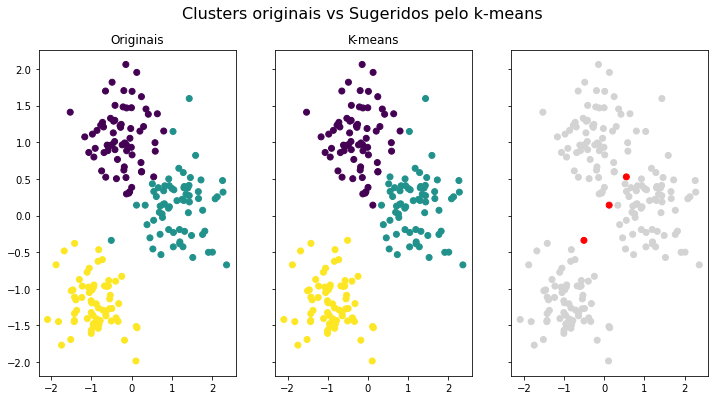

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)
fig.suptitle(f"Clusters originais vs Sugeridos pelo k-means", fontsize=16)

ax1.scatter(df1['X'],df1['Y'], c=df1['label original'])
ax1.set_title(
    f"Originais", fontdict={"fontsize": 12}
)

ax2.scatter(df1['X'],df1['Y'], c=df1['label sugerido'])
ax2.set_title(
    f"K-means", fontdict={"fontsize": 12}
)

ax3.scatter(df1['X'],df1['Y'], c=df1['mudou'])
ax2.set_title(
    f"K-means", fontdict={"fontsize": 12}
)
plt.show()

Vamos verificar os grupos sugeridos e os repectivos centroides:

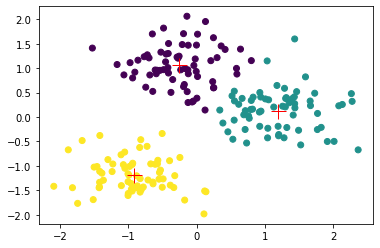

In [ ]:
plt.scatter(df1['X'], df1['Y'], c=df1['label sugerido'])
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', c='red',ls='none',ms=15)
plt.show()

**Exercício 2**: utilizando a função `make_blobs()`, gere um conjunto de dados diferente dos que foram utilizados nos exemplos anteriores (dica: mude o valor do `random_state`), depois, aplique o algoritmo `k-means` e verifique se ele sugere como resultado os mesmos `clusters` (`labels`) para os elementos gerados. Ao final, crie uma tabela (`dataframe`) e um gráfico que ilustrem os eventuais elementos (pontos) com diferenças.

## Avaliando o resultado

A avaliação do processo de *clustering* é algo subjetivo. O que vem a ser um bom *cluster*? Como saber se a quantidade de *clusters* é a melhor para determinado conjunto de dados?

Em teoria, há duas maneiras de avaliar os resultados: (1) interna e (2) externa. Sobre esse assunto, aos que tiverem interesse em se aprofundar na teoria envolvida, sugiro a leitura dos seguintes artigos:

* [Clustering Validity](https://doi.org/10.1007/978-0-387-39940-9_616)
* [Cluster Validity Methods: Part I](https://dl.acm.org/doi/10.1145/565117.565124)
* [Cluster Validity checking Methods: Part II](https://dl.acm.org/doi/10.1145/601858.601862)

Quando temos os dados previamente etiquetados (i.e., sabemos os *labels*, os *clusters* aos quais pertencem), podemos utilizar a avalição externa (i.e., dados externos ao processo, os quais podem ser usados para compararmos se o resultado obtido equivale a um resultado esperado). 

No entanto, esse não é o caso para a maioria dos dados que pretendemos *clusterizar* (e se o fosse, a *clusterização* talvez não fizesse sentido, mas sim uma classificação). A análise externa é, portanto, mais apropriada quando estamos criando novos algoritmos de *clusterização* e queremos avaliar seu comportamento ou *performance*.

Em casos reais, não teremos informação prévia sobre os *clusters* dos dados e a análise é do tipo exploratória. O ideal, portanto, seria usarmos avaliação interna, i.e., considerando a informação apresentada pelos próprios *clusters*.

Para a avaliação interna existem várias métricas que podem ser utilizadas. 

Vamos utilizar duas neste momento:

- *Sum of Squared Error* (SSE). 
- Coeficiente *Silhouette*.

*Sum of Squared Error* (SSE) consiste na soma das diferenças quadradas entre cada elemento e a média do grupo. Ela avalia a variância intra-clusters, sendo uma medida de coesão interna. Quanto menor o SSE, mais similares são os elementos entre si, no mesmo *cluster*. 

Teríamos também o [*Sum of Squares Between (SSB)*](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set), que mede a variância inter-cluster (i.e., a separação externa). Porém, quando ajustamos o SSE, ele também é ajustado (i.e., ao minimizarmos um, o outro é maximizado).

O coeficiente *Silhouette* avalia a consistência do resultado, determinando quão bem cada objeto foi agrupado. Ele avalia quão similar um objeto é em relação ao *cluster* ao qual ele foi atribuído (coesão) em comparação com outros *clusters* (separação). O resultado é um valor entre `-1` e `+1`. Valores altos indicam que os objetos estão bem alocados em um *cluster* e fracamente casados com *clusters* vizinhos. 

Sugiro a leitura dos seguintes materiais, caso tenha interesse em aprendar mais sobre essas métricas e a avaliação de clusters:

* [K-Means Clustering Explained Simply](https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b)
* [Sum of Squared Error (SSE) in Cluster Analysis](https://www.clusteranalysis4marketing.com/interpretation/sum-of-squared-error-sse/)
* [Error Sum of Squares](https://hlab.stanford.edu/brian/error_sum_of_squares.html)

O resultado dessas métricas são números. Por si só não indicam muita coisa, para um único resultado. Sua utilidade é avaliar o quão bom é o resultado de um processo de agrupamento, e essa comparação deve ser feita com outros resultados. No caso do `k-means`, o que fazemos é aplicar o algoritmo com diferentes valores de `k` e compararmos o resultado dessas métricas. Ao final, escolhemos o modelo com valor de `k` que gerou melhores resultados. Essa técnica é chamada de [método do cotovelo (elbow)](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), que é heurístico. 

Vamos iniciar com o `SSE`.

O código seguinte aplica o `k-means` no mesmo *dataset*, mas com diferentes valores de `k`, e armazena o resultado em uma lista. Depois, geramos um gráfico comparativo do valor de `SSE` para cada valor de `k`. 

In [ ]:
# define os parâmeros-padrão do k-means
parametros_basicos_kmeans = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

resultados_sse = [] # lista que armazena o SSE de cada 'k' 

# executa o algoritmo para 'k' variando entre 1 e 10:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **parametros_basicos_kmeans)
    kmeans.fit(scaled_features)
    resultados_sse.append(kmeans.inertia_)

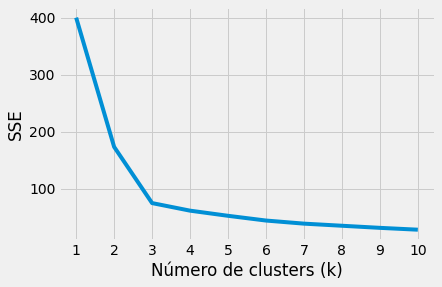

In [ ]:
# gera o gráfico correlacionando SSE com valor de 'k'
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), resultados_sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters (k)")
plt.ylabel("SSE")
plt.show()

Perceba que o valor de SSE é inversamente proporcional à quantidade de clusters (valor de `k`). Quanto mais *clusters* temos, menor é o SSE. Isso significa que, quanto mais centroides tivermos, menor será a distância entre cada ponto e seu centroide mais próximo. 

De acordo com a heurística do `método do cotovelo` (*elbow*), o objetivo consiste em identificar o ponto onde a curva se dobra de maneira mais visível, especificamente da inclinação mais alta para a mais baixa (o ponto de maior inflexão). 

No gráfico acima, podemos observar que esse *joelho* ocorre bem no ponto onde `k=3`. Nesse ponto, há um [*trade-off*](https://pt.wikipedia.org/wiki/Trade-off) entre o número de *clusters* e o erro associado. 

Algumas vezes é complicado identificar visualmente esse local. Nesses casos, podemos usar a função `KneeLocator` da biblioteca `kneed`, que localiza esse ponto para nós. 

Veja:

In [ ]:
kl = KneeLocator(range(1, 11), resultados_sse, curve="convex", direction="decreasing")
print(f"Valor sugerido para 'k': {kl.elbow}")

Valor sugerido para 'k': 3


Vamos avaliar agora o coeficiente `Silhouette`, que combina coesão e separação entre os *clusters* (e seus elementos). 

A biblioteca `scikit-learn` também nos fornece uma implementação dessa métrica. Vamos usar o código seguinte para avaliar os coeficientes para diferentes valores de `k`, como fizemos anteriormente. Depois vamos gerar um gráfico com o resultado:

In [ ]:
# define os parâmeros-padrão do k-means
parametros_basicos_kmeans = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

resultados_silhouette = [] # lista que armazena o silhouette de cada 'k' 

# executa o algoritmo para 'k' variando entre 2 e 10
# o Silhouette só funciona quando temos 2 ou mais clusters!
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **parametros_basicos_kmeans)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    resultados_silhouette.append(score)

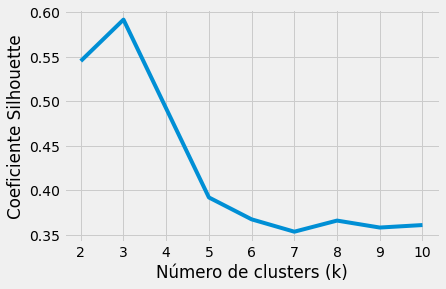

In [ ]:
# gera o grafico correlacionando Silhouette com valor de 'k'
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), resultados_silhouette)
plt.xticks(range(2, 11))
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente Silhouette")
plt.show()

Perceba que o pico está no `k=3` (para o Silhouette, quanto maior o valor,melhor). 

Essas métricas auxiliam na análise, mas não devem ser interpretadas unicamente. A decisão deve sempre ser guiada por uma análise combinada de métricas e conhecimento de domínio...

**Exercício 3**: utilize o conjunto de dados gerado pelo *script* seguinte. Similarmente ao que foi feito acima, aplique o algoritmo `k-médias` e gere curvas de SSE e Silhouette que lhe ajudem a identificar a melhor quantidade de clusters. Avalie se o resultado dos gráficos têm coerência com os dados gerados e com o valor fornecido pelo `KneeLocator`. Faça uma interpretação do resultado (gere gráficos comparativos e descreva textualmente o resultado, com suas palavras). 

In [ ]:
from sklearn.datasets import make_moons
features, labels = make_moons(n_samples=300, noise=0.15, random_state=42)
scaled_features = scaler.fit_transform(features)

Vamos agora processar um dataset mais real.

Você pode carrear seus dados, desde que possuam variáveis quantitativas (numéricas), pois o `k-medias` funciona nesse tipo de dados. Terá eventualmente que garantir que está bem preparado, processado, etc.

Alternativamente, vamos usar um *dataset* disponível publicamente na própria biblioteca scikit-learn: o `iris`.

Esse *dataset* contém dados relacionados com um tipo específico de planta chamada Íris, e contém `3` classes diferentes e `50` observações de cada classe. Cada observação possui `4` variáveis: largura da sépala, comprimento da sépala, largura da pétala e comprimento da pétala. Todos em centímetros. Mais detalhes podem ser obtidos em: https://archive.ics.uci.edu/ml/datasets/iris.

O código seguinte carrega o *dataset* e mostra seu conteúdo na tela:

In [ ]:
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
data["target"] = target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Este *dataset* contém a informação de a qual classe (tipo de Íris) cada elemento pertence. Então, como no caso anterior, será mais fácil avaliarmos se os *clusters* gerados são consistentes ou não.

A seguir você encontra algumas visualizações desse conjunto de dados, através de um *pair-plot* que correlaciona cada variável com todas as outras, par-a-par. Elas servem para nos mostrar como os elementos estão distribuídos entre as diferentes dimensões. Temos `4` dimensões (e não mais `2` como no anterior). Quanto maior for o número de dimensões, mais complexo (e demorado) se torna o processo.

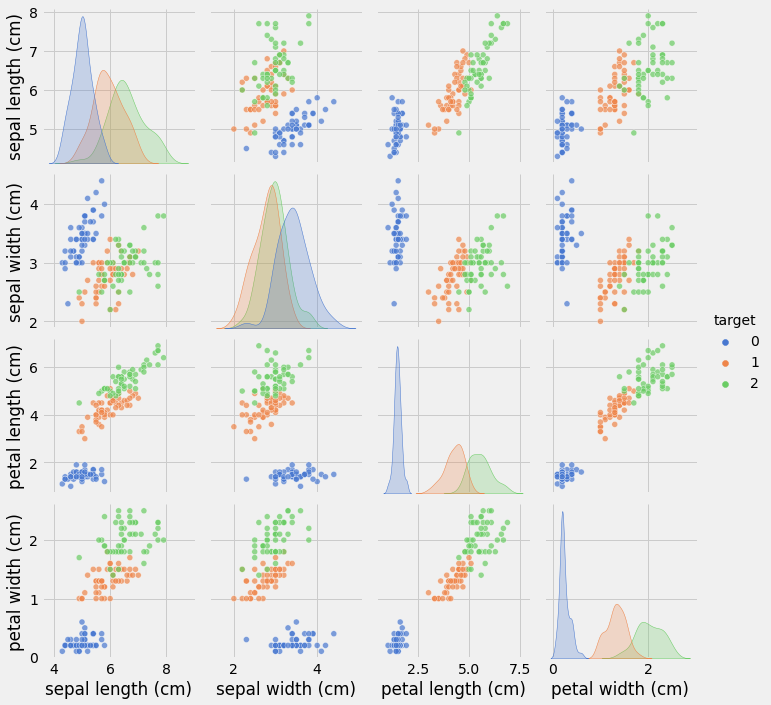

In [ ]:
sns.pairplot(data, kind="scatter", diag_kind="kde", hue="target", palette="muted", plot_kws={'alpha':0.7})
plt.show()

**Exercício 4**: aplique o `k-means` no dataset `iris`. Identifique a melhor quantidade de *clusters* através do método do cotovelo (seja pelo gráfico ou pelo `knee-locator`).

**DESAFIO**: Mostre o resultado de forma visual, em um espaço 2D ou 3D!